In [1]:
import joblib
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

## 1. import data

### load data

In [2]:
df = pd.read_csv('../data/List of Artificial Objects on the Moon.csv', index_col=0)
df

,Artificial object,Country,Year,Mass (lb),Mass (kg),Status,Location
0,Luna 2,Soviet Union,1959,860,390,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E
1,Luna 2 Third stage of Vostok rocket,Soviet Union,1959,20100,9100,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E
2,Ranger 4,United States,1962,730,331,Intentionally crashed,15°30′S 130°42′W﻿ / ﻿15.5°S 130.7°W
3,Ranger 6,United States,1964,840,381,Intentionally crashed,9°21′29″N 21°28′48″E﻿ / ﻿9.358°N 21.480°E
4,Ranger 7,United States,1964,805,365,Intentionally crashed,10°38′S 20°36′W﻿ / ﻿10.63°S 20.60°W
...,...,...,...,...,...,...,...
84,Hakuto-R Mission 1,Japan,2023,750,340,Crashed,47°34′52″N 44°05′38″E﻿ / ﻿47.581°N 44.094°E
85,Emirates Lunar Mission,United Arab Emirates,2023,750,340,Crashed,47°34′52″N 44°05′38″E﻿ / ﻿47.581°N 44.094°E
86,Luna 25,Russia,2023,3860,1750,Crashed,NaN
87,Chandrayaan-3 Vikram lander Pragyan rover,India,2023,3863,1752,Operational,69°22′01″S 32°20′53″E﻿ / ﻿69.367°S 32.348°E


In [3]:
# baris terkahir bukan merupakan data artifitial object
df = df[:-1]

In [4]:
df

,Artificial object,Country,Year,Mass (lb),Mass (kg),Status,Location
0,Luna 2,Soviet Union,1959,860,390,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E
1,Luna 2 Third stage of Vostok rocket,Soviet Union,1959,20100,9100,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E
2,Ranger 4,United States,1962,730,331,Intentionally crashed,15°30′S 130°42′W﻿ / ﻿15.5°S 130.7°W
3,Ranger 6,United States,1964,840,381,Intentionally crashed,9°21′29″N 21°28′48″E﻿ / ﻿9.358°N 21.480°E
4,Ranger 7,United States,1964,805,365,Intentionally crashed,10°38′S 20°36′W﻿ / ﻿10.63°S 20.60°W
...,...,...,...,...,...,...,...
83,Manfred Memorial Moon Mission,Luxembourg,2022,31,14,Crashed,5°13′34″N 125°30′50″W﻿ / ﻿5.226°N 125.514°W
84,Hakuto-R Mission 1,Japan,2023,750,340,Crashed,47°34′52″N 44°05′38″E﻿ / ﻿47.581°N 44.094°E
85,Emirates Lunar Mission,United Arab Emirates,2023,750,340,Crashed,47°34′52″N 44°05′38″E﻿ / ﻿47.581°N 44.094°E
86,Luna 25,Russia,2023,3860,1750,Crashed,NaN


### check data shapes & types

In [5]:
df.shape

(88, 7)

In [6]:
df.dtypes

Artificial object    object
Country              object
Year                 object
Mass (lb)            object
Mass (kg)            object
Status               object
Location             object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Artificial object  88 non-null     object
 1   Country            88 non-null     object
 2   Year               88 non-null     object
 3   Mass (lb)          88 non-null     object
 4   Mass (kg)          88 non-null     object
 5   Status             88 non-null     object
 6   Location           87 non-null     object
dtypes: object(7)
memory usage: 5.5+ KB


### check duplicate

In [8]:
df.duplicated().sum()

0

## 2. data cleaning

In [9]:
# dalam project ini kita akan menggunakan data berat dengan satuan kg
# ada beberapa object yang beratnya tidak diketahui persis
df[~df['Mass (kg)'].str.isnumeric()]

,Artificial object,Country,Year,Mass (lb),Mass (kg),Status,Location
48,Luna 20 descent stage[d],Soviet Union,1972,"<12,626","<5,727",Landed,3°34′N 56°30′E﻿ / ﻿3.57°N 56.5°E
62,Luna 24 descent stage[d],Soviet Union,1976,"<12,787","<5,800",Landed,12°45′N 62°12′E﻿ / ﻿12.75°N 62.20°E
70,SELENE (Kaguya) main orbiter,Japan,2009,4374,"1,984[76]",Intentionally crashed,65°30′S 80°30′E﻿ / ﻿65.5°S 80.5°E
80,Chang'e 5 descent stage,China,2020,"<18,077","<8,200",Operational,43°05′56″N 51°50′13″W﻿ / ﻿43.099°N 51.837°W
81,Chang'e 5 ascent stage,China,2020,>400,>882,Intentionally crashed,30°00′00″S 0°00′00″E﻿ / ﻿30.000°S 0.000°E


In [10]:
# simpan id data yang beratnya bermasalah, untuk perbandingan setelah perbaikan
non_numeric_mass_id = df[~df['Mass (kg)'].str.isnumeric()].index

In [11]:
# karena datanya sedikit dan ini masih merupakan project latihan
# - data yang beratnya berupa perkiraan (< atau >), kita gunakan berat perkiraannya
# - data pada id 70, jika konversi lb ke kg, maka data yang benar data yang diluar kurung

df['Mass (kg)'] = df['Mass (kg)'].str.replace('<|>|,|\[76\]', '', regex=True)

/var/folders/1s/pgdsl6w55ln3b46c2439bt5c0000gn/T/ipykernel_10155/4003760490.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mass (kg)'] = df['Mass (kg)'].str.replace('<|>|,|\[76\]', '', regex=True)


In [12]:
df.loc[non_numeric_mass_id]

,Artificial object,Country,Year,Mass (lb),Mass (kg),Status,Location
48,Luna 20 descent stage[d],Soviet Union,1972,"<12,626",5727,Landed,3°34′N 56°30′E﻿ / ﻿3.57°N 56.5°E
62,Luna 24 descent stage[d],Soviet Union,1976,"<12,787",5800,Landed,12°45′N 62°12′E﻿ / ﻿12.75°N 62.20°E
70,SELENE (Kaguya) main orbiter,Japan,2009,4374,1984,Intentionally crashed,65°30′S 80°30′E﻿ / ﻿65.5°S 80.5°E
80,Chang'e 5 descent stage,China,2020,"<18,077",8200,Operational,43°05′56″N 51°50′13″W﻿ / ﻿43.099°N 51.837°W
81,Chang'e 5 ascent stage,China,2020,>400,882,Intentionally crashed,30°00′00″S 0°00′00″E﻿ / ﻿30.000°S 0.000°E


### perbaikan tipe data

In [13]:
df.dtypes

Artificial object    object
Country              object
Year                 object
Mass (lb)            object
Mass (kg)            object
Status               object
Location             object
dtype: object

In [14]:
# ubah tipe data column 'Mass (kg)' menjadi int
df['Mass (kg)'] = df['Mass (kg)'].astype(int)

/var/folders/1s/pgdsl6w55ln3b46c2439bt5c0000gn/T/ipykernel_10155/395908905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mass (kg)'] = df['Mass (kg)'].astype(int)


In [15]:
df.dtypes

Artificial object    object
Country              object
Year                 object
Mass (lb)            object
Mass (kg)             int64
Status               object
Location             object
dtype: object

## 3. exploratory data analysis

In [16]:
df['Country'].value_counts()

Country
United States            47
Soviet Union             21
China                     7
Japan                     5
India                     3
European Space Agency     1
Israel                    1
Luxembourg                1
United Arab Emirates      1
Russia                    1
Name: count, dtype: int64

<Axes: xlabel='Year'>

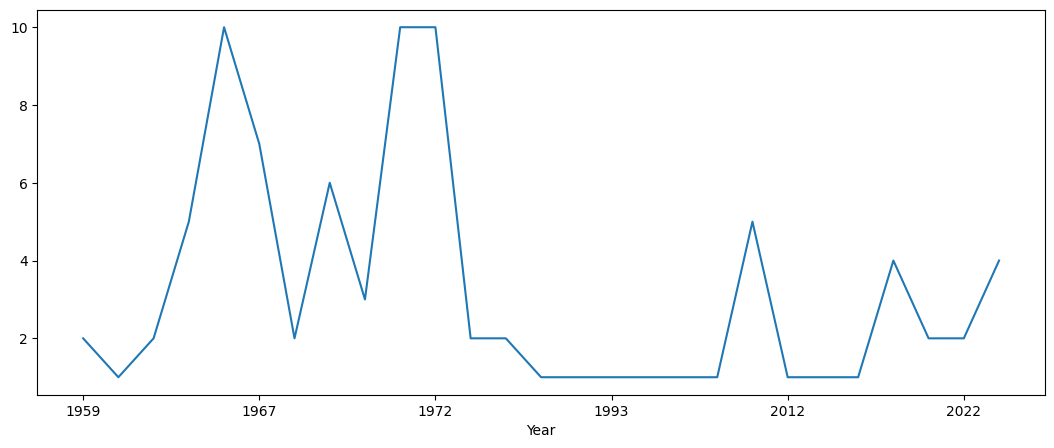

In [17]:
df['Year'].value_counts().sort_index().plot(figsize=(13, 5))

<Axes: >

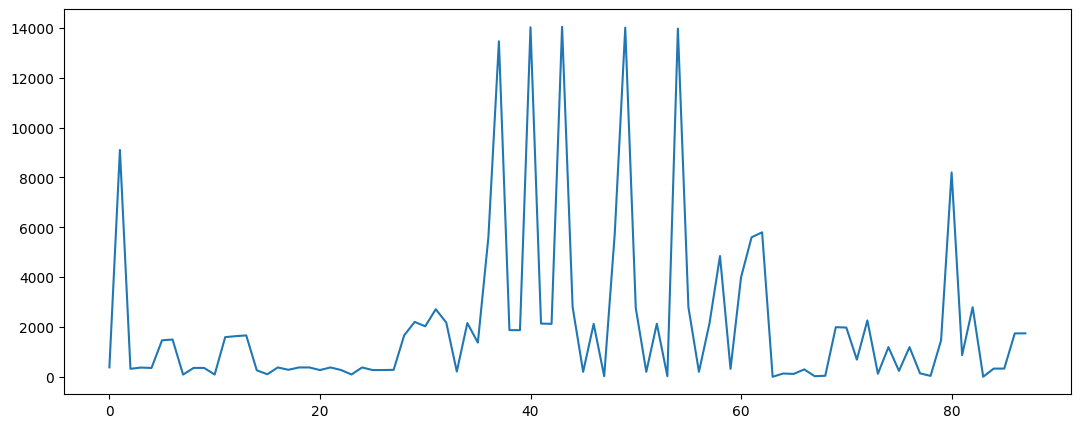

In [18]:
df['Mass (kg)'].plot(figsize=(13, 5))

In [19]:
df['Status'].value_counts()

Status
Intentionally crashed            22
Landed                           21
Crashed                          18
Crashed (post-mission)           15
Operational                       3
Landed[b]                         1
Crashed (post mission)            1
Likely Crashed (post-mission)     1
Crashed into moon or in Orbit     1
Crashed (not confirmed)           1
Landed[87]                        1
Crashed[92][93]                   1
Intentionally crashed[94]         1
Crashed[96]                       1
Name: count, dtype: int64

## 4. data engineering

In [20]:
# karena rusia adalah penerus terbesar dari uni soviet dalam hal program antariksa
# maka kita akan menggabungkan 'Soviet Union' dan 'Russia'
# sedangkan sisa negara yang hanya meluncurkan 1 object, akan digabung menjadi 'other'

def country_mapping(country):
    if country == 'Soviet Union':
        return 'russia'
    elif country == 'European Space Agency':
        return 'other'
    elif country == 'Israel':
        return 'other'
    elif country == 'Luxembourg':
        return 'other'
    elif country == 'United Arab Emirates':
        return 'other'
    else:
        return country.lower()
    
df['Country'] = df['Country'].apply(lambda x: country_mapping(x))

/var/folders/1s/pgdsl6w55ln3b46c2439bt5c0000gn/T/ipykernel_10155/4048305734.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].apply(lambda x: country_mapping(x))


In [21]:
df.head()

,Artificial object,Country,Year,Mass (lb),Mass (kg),Status,Location
0,Luna 2,russia,1959,860,390,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E
1,Luna 2 Third stage of Vostok rocket,russia,1959,20100,9100,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E
2,Ranger 4,united states,1962,730,331,Intentionally crashed,15°30′S 130°42′W﻿ / ﻿15.5°S 130.7°W
3,Ranger 6,united states,1964,840,381,Intentionally crashed,9°21′29″N 21°28′48″E﻿ / ﻿9.358°N 21.480°E
4,Ranger 7,united states,1964,805,365,Intentionally crashed,10°38′S 20°36′W﻿ / ﻿10.63°S 20.60°W


In [22]:
# mengelompokkan setiap 10 tahun dan menjadikan decade petama = 0
df['Decade'] = df.Year.apply(lambda x: int(x) // 10 - 195)

/var/folders/1s/pgdsl6w55ln3b46c2439bt5c0000gn/T/ipykernel_10155/99322459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Decade'] = df.Year.apply(lambda x: int(x) // 10 - 195)


In [23]:
df.head()

,Artificial object,Country,Year,Mass (lb),Mass (kg),Status,Location,Decade
0,Luna 2,russia,1959,860,390,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E,0
1,Luna 2 Third stage of Vostok rocket,russia,1959,20100,9100,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E,0
2,Ranger 4,united states,1962,730,331,Intentionally crashed,15°30′S 130°42′W﻿ / ﻿15.5°S 130.7°W,1
3,Ranger 6,united states,1964,840,381,Intentionally crashed,9°21′29″N 21°28′48″E﻿ / ﻿9.358°N 21.480°E,1
4,Ranger 7,united states,1964,805,365,Intentionally crashed,10°38′S 20°36′W﻿ / ﻿10.63°S 20.60°W,1


In [24]:
# membuat data 'survival' berdasarkan data 'status'
df['Survival'] = df['Status'].apply(lambda x: 1-int('crashed' in str(x).lower()))

/var/folders/1s/pgdsl6w55ln3b46c2439bt5c0000gn/T/ipykernel_10155/3440180842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survival'] = df['Status'].apply(lambda x: 1-int('crashed' in str(x).lower()))


In [25]:
df.head()

,Artificial object,Country,Year,Mass (lb),Mass (kg),Status,Location,Decade,Survival
0,Luna 2,russia,1959,860,390,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E,0,0
1,Luna 2 Third stage of Vostok rocket,russia,1959,20100,9100,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E,0,0
2,Ranger 4,united states,1962,730,331,Intentionally crashed,15°30′S 130°42′W﻿ / ﻿15.5°S 130.7°W,1,0
3,Ranger 6,united states,1964,840,381,Intentionally crashed,9°21′29″N 21°28′48″E﻿ / ﻿9.358°N 21.480°E,1,0
4,Ranger 7,united states,1964,805,365,Intentionally crashed,10°38′S 20°36′W﻿ / ﻿10.63°S 20.60°W,1,0


In [26]:
county_suvival = df.groupby(['Country', 'Survival'])[['Artificial object']].count().unstack()
county_suvival

Artificial object      
Survival                      0     1
Country                              
china                       4.0   3.0
india                       2.0   1.0
japan                       5.0   NaN
other                       4.0   NaN
russia                     14.0   8.0
united states              33.0  14.0

<Axes: xlabel='Country'>

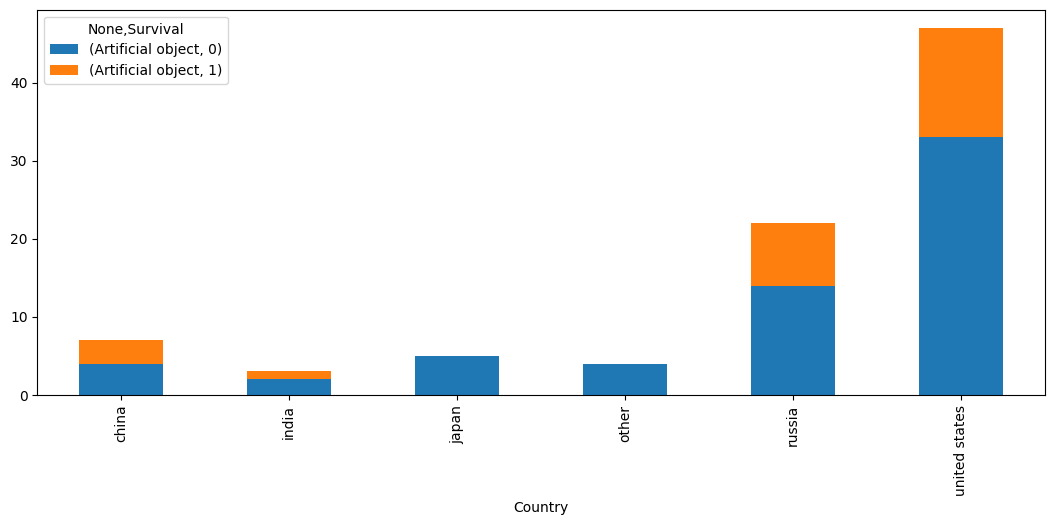

In [27]:
county_suvival.plot(kind='bar', figsize=(13, 5), stacked=True)

In [28]:
decade_suvival = df.groupby(['Decade', 'Survival'])[['Artificial object']].count().sort_index().unstack()
decade_suvival

Artificial object      
Survival                 0     1
Decade                          
0                      2.0   NaN
1                     24.0   9.0
2                     15.0  13.0
4                      3.0   NaN
5                      7.0   NaN
6                      5.0   2.0
7                      6.0   2.0

<Axes: xlabel='Decade'>

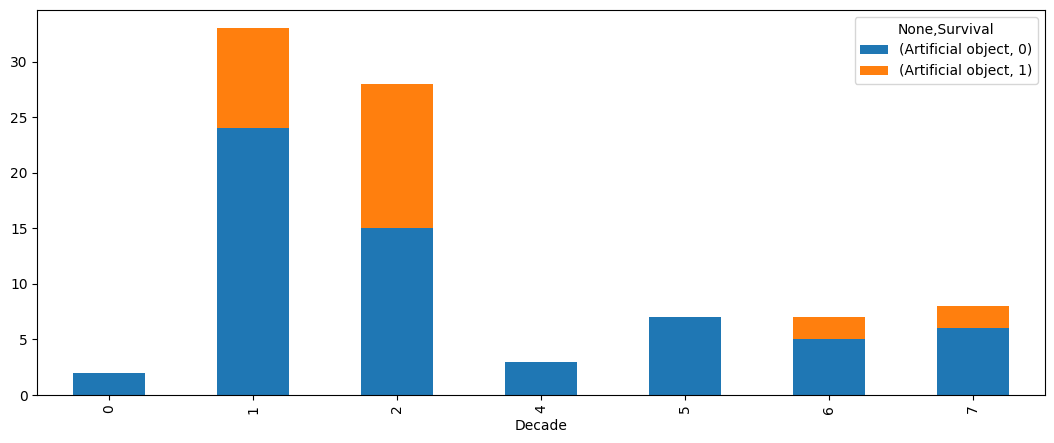

In [29]:
decade_suvival.plot(kind='bar', figsize=(13, 5), stacked=True)

In [30]:
survivle = df['Survival'].value_counts()
survivle

Survival
0    62
1    26
Name: count, dtype: int64

<Axes: xlabel='Survival'>

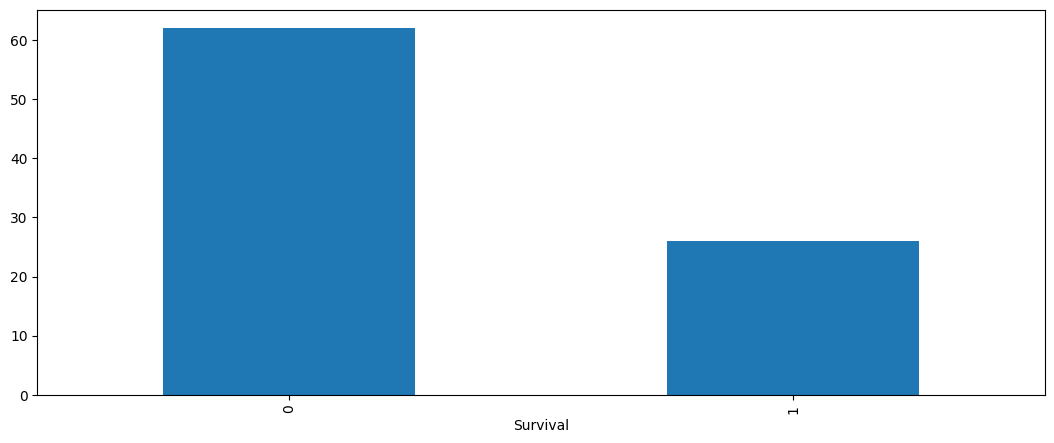

In [31]:
survivle.plot(kind='bar', figsize=(13, 5))

### buat fungsi load

In [32]:
def load_artifitial_object_data(path):
    '''
    function to load artifitial object data

    parameters
    ----------
    path : str
        path of artifitial object data (.csv)

    returns
    -------
    df : pandas dataframe
        artifitial object data
    '''
    
    # load data
    df = pd.read_csv(path, index_col=0)
    
    # baris terkahir bukan merupakan data artifitial object
    df = df[:-1]
    
    print('original data shape:', df.shape)
    
    # dalam project ini kita akan menggunakan berat dengan satuan kg
    # data yang beratnya berupa perkiraan (< atau >), kita gunakan berat perkiraannya
    # data pada id 70, jika konversi lb ke kg, maka data yang benar data yang diluar kurung
    df['Mass'] = df['Mass (kg)'].str.replace('<|>|,|\[76\]', '', regex=True)
    
    # ubah tipe data column 'Mass' menjadi int
    df['Mass'] = df.Mass.astype(int)
    
    # country mapping
    df['Country'] = df.Country.apply(lambda x: country_mapping(x))
    contry = df.Country.str.get_dummies()
    
    # mengelompokkan setiap 10 tahun dan menjadikan decade petama = 0
    df['Decade'] = df.Year.apply(lambda x: int(x) // 10 - 195)
    
    # membuat data 'survival' berdasarkan data 'status'
    df['Survival'] = df.Status.apply(lambda x: 1-int('crashed' in str(x).lower()))
    
    df = contry.join(df[['Decade', 'Mass', 'Survival']])
    print('final data shape:', df.shape)
            
    # generate feature and label
    y = df['Survival']
    X = df.drop('Survival', axis=1)    

    return X, y

In [33]:
X, y = load_artifitial_object_data('../data/List of Artificial Objects on the Moon.csv')

original data shape: (88, 7)
final data shape: (88, 9)


In [34]:
X.head()

,china,india,japan,other,russia,united states,Decade,Mass
0,0,0,0,0,1,0,0,390
1,0,0,0,0,1,0,0,9100
2,0,0,0,0,0,1,1,331
3,0,0,0,0,0,1,1,381
4,0,0,0,0,0,1,1,365


In [35]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Survival, dtype: int64

## 5. modeling

In [36]:
model = RandomForestClassifier()

# daftar parameter
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20]}

# buat objek gridsearchcv dengan model, parameter grid, dan metrik evaluasi
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# lakukan pencarian parameter pada data dengan validasi silang
grid_search.fit(X, y)

# tampilkan parameter terbaik
print('parameter terbaik:', grid_search.best_params_)

# hitung akurasi model dengan cross_val_score menggunakan parameter terbaik
best_model = grid_search.best_estimator_
accuracy_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

# tampilkan akurasi rata-rata dari cross_val_score
print('akurasi rata-rata:', accuracy_scores.mean())

# save model
joblib.dump(best_model, '../model/rfc_model.pkl')

/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_

parameter terbaik: {'max_depth': None, 'n_estimators': 50}


/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

akurasi rata-rata: 0.7398692810457517


/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_

['../model/rfc_model.pkl']

In [37]:
model = KNeighborsClassifier()

# daftar parameter
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance']}

# buat objek gridsearchcv dengan model, parameter grid, dan metrik evaluasi
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# lakukan pencarian parameter pada data dengan validasi silang
grid_search.fit(X, y)

# tampilkan parameter terbaik
print('parameter terbaik:', grid_search.best_params_)

# hitung akurasi model dengan cross_val_score menggunakan parameter terbaik
best_model = grid_search.best_estimator_
accuracy_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

# tampilkan akurasi rata-rata dari cross_val_score
print('akurasi rata-rata:', accuracy_scores.mean())

# save model
joblib.dump(best_model, '../model/knn_model.pkl')

/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

parameter terbaik: {'n_neighbors': 3, 'weights': 'uniform'}
akurasi rata-rata: 0.7405228758169935


/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/zain/python/pacmann/ml_process/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

['../model/knn_model.pkl']